
# Intro to NBA Data with nba_api pt 3
## Let's learn MORE about the capabilities of the `players` module

Now I want to create a plot for creating the true shooting percentage of any player over the years, by creating some functions that feed that name through and output a plot. This will build on the work in part 2.



In [10]:
#let's import our modules and whatnot from nba_api and others:
from nba_api.stats.static import players
import pandas as pd
import matplotlib.pyplot as plt
#game log stats
from nba_api.stats.endpoints import playergamelog
#create parameter to feed `season` that includes all seasons for that player/team
from nba_api.stats.library.parameters import SeasonAll 




First step: prompt the user for their player of interest, and catch the error if they enter a player that is not in the `.find_players_by_full_name() function

In [11]:
valid_input = False
#loop until valid input
while not valid_input:
    try:
        player_name = input("Please enter the full name of an NBA player: ")
        #first list index is the dict w/id, name, and activity status
        player = players.find_players_by_full_name(player_name)[0]
        # If the above line doesn't raise an IndexError, the input is valid
        valid_input = True
    except IndexError: 
        print("Invalid entry. Type an NBA player's full name, separated by a space.")
print(f"Good choice! You chose {player['full_name']}!")


Good choice! You chose Giannis Antetokounmpo!


In [12]:
#let's look at the object returned, should be a player_dict
player

{'id': 203507,
 'full_name': 'Giannis Antetokounmpo',
 'first_name': 'Giannis',
 'last_name': 'Antetokounmpo',
 'is_active': True}

Step 2: grab that particular player's data with the `.get_data_frames()` module and select the first list element. We'll show a sample:

In [13]:
#Next, we use that player's 'id' value to call their logs up
player_log = playergamelog.PlayerGameLog(player_id = player['id'],season = SeasonAll.all)
player_df = player_log.get_data_frames()[0]
player_df.sample(5)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
341,22018,203507,0021800175,"NOV 10, 2018",MIL @ LAC,L,41,11,19,0.579,...,14,18,4,5,2,6,5,27,-7,1
256,22019,203507,0021900347,"DEC 09, 2019",MIL vs. ORL,W,35,12,22,0.545,...,11,15,8,1,1,2,3,32,8,1
328,22018,203507,0021800388,"DEC 09, 2018",MIL @ TOR,W,37,8,15,0.533,...,14,19,6,0,1,2,3,19,9,1
703,22013,203507,0021300702,"FEB 01, 2014",MIL @ MEM,L,20,1,3,0.333,...,0,0,1,1,0,2,1,3,2,1
458,22016,203507,0021600761,"FEB 04, 2017",MIL @ PHX,W,34,12,20,0.600,...,10,12,6,0,4,4,4,30,34,1


Step 2.5: We'll quickly make a change to the data frame so that the season column has a better name and make the year an accurate year (take off the extra 2, as we saw in the sample that each year was written '220XX').

In [14]:
player_df.rename(columns = {'SEASON_ID':'SEASON'},inplace = True) #rename column for season_id to season
player_df['SEASON'] = player_df['SEASON'].str.slice(1) #get rid of first digit in that string

Step 3: Now that we've got the player's game logs pulled up as a df, let's create a true shooting stat for each season and plot it. 
True shooting is explained in part 2 and is created using Pts, Fga and Fta from our game logs data frame for this player.

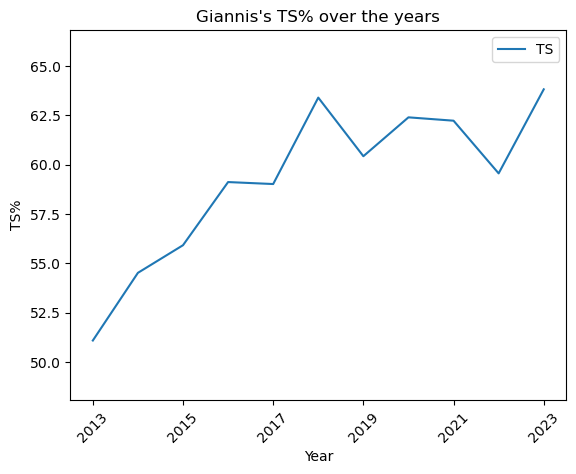

In [15]:

player_TS_df = (player_df.groupby('SEASON') #group by season
    .agg(({'FGA':'sum','PTS':'sum','FTA':'sum'})) # aggregate sums for our variables of interest
    .assign(TS = lambda x:(.5*x['PTS'])/(x['FGA']+ (.475*x['FTA']))*100) #create TS column for TS%
    .round(2) #round this column to 2
    [['TS']] # Select only the relevant column (and SEASON, as it's our groups)
    )

#let's make a max and min for our plot that correspond with the TS values
ymax = player_TS_df['TS'].max()
ymin = player_TS_df['TS'].min()

#now make a plot the TS data frame
player_TS_df.plot()
#with changes using matplotlib.pyplot
plt.title(f"{player['first_name']}'s TS% over the years")
plt.xlabel("Year")
plt.ylabel("TS%")
plt.xticks(rotation = 45) #rotate x ticks 45˚
plt.ylim(top = ymax + 3,bottom = ymin -3)
plt.show()
